Applied Practice for Chapter 3

In [79]:
#package import
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [75]:
#load data
data=pd.read_csv('G:/Code Repo/Data Science/ISLR Learning/Data/Auto.csv')
data=pd.DataFrame(data)
display(data.head(3))
data.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [76]:
#find the non-numeric values
q1=data[['horsepower','mpg']]
q1=q1[pd.to_numeric(q1['horsepower'], errors='coerce').isnull()==False]
q1=q1[pd.to_numeric(q1['mpg'], errors='coerce').isnull()==False]
horsepower=np.array(q1['horsepower']).reshape(-1,1)
mpg=np.array(q1['mpg']).reshape(-1,1)

In [77]:
#train model
regressor = LinearRegression()  
regressor.fit(horsepower, mpg)
print('Coefficients: \n', regressor.coef_)
print('Coefficients: \n', regressor.score)

Coefficients: 
 [[-0.15784473]]
Coefficients: 
 <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>


In [78]:
#predict horsepower
mpg_hat = regressor.predict(np.array([[95]]))
print(mpg_hat)

[[24.94061135]]


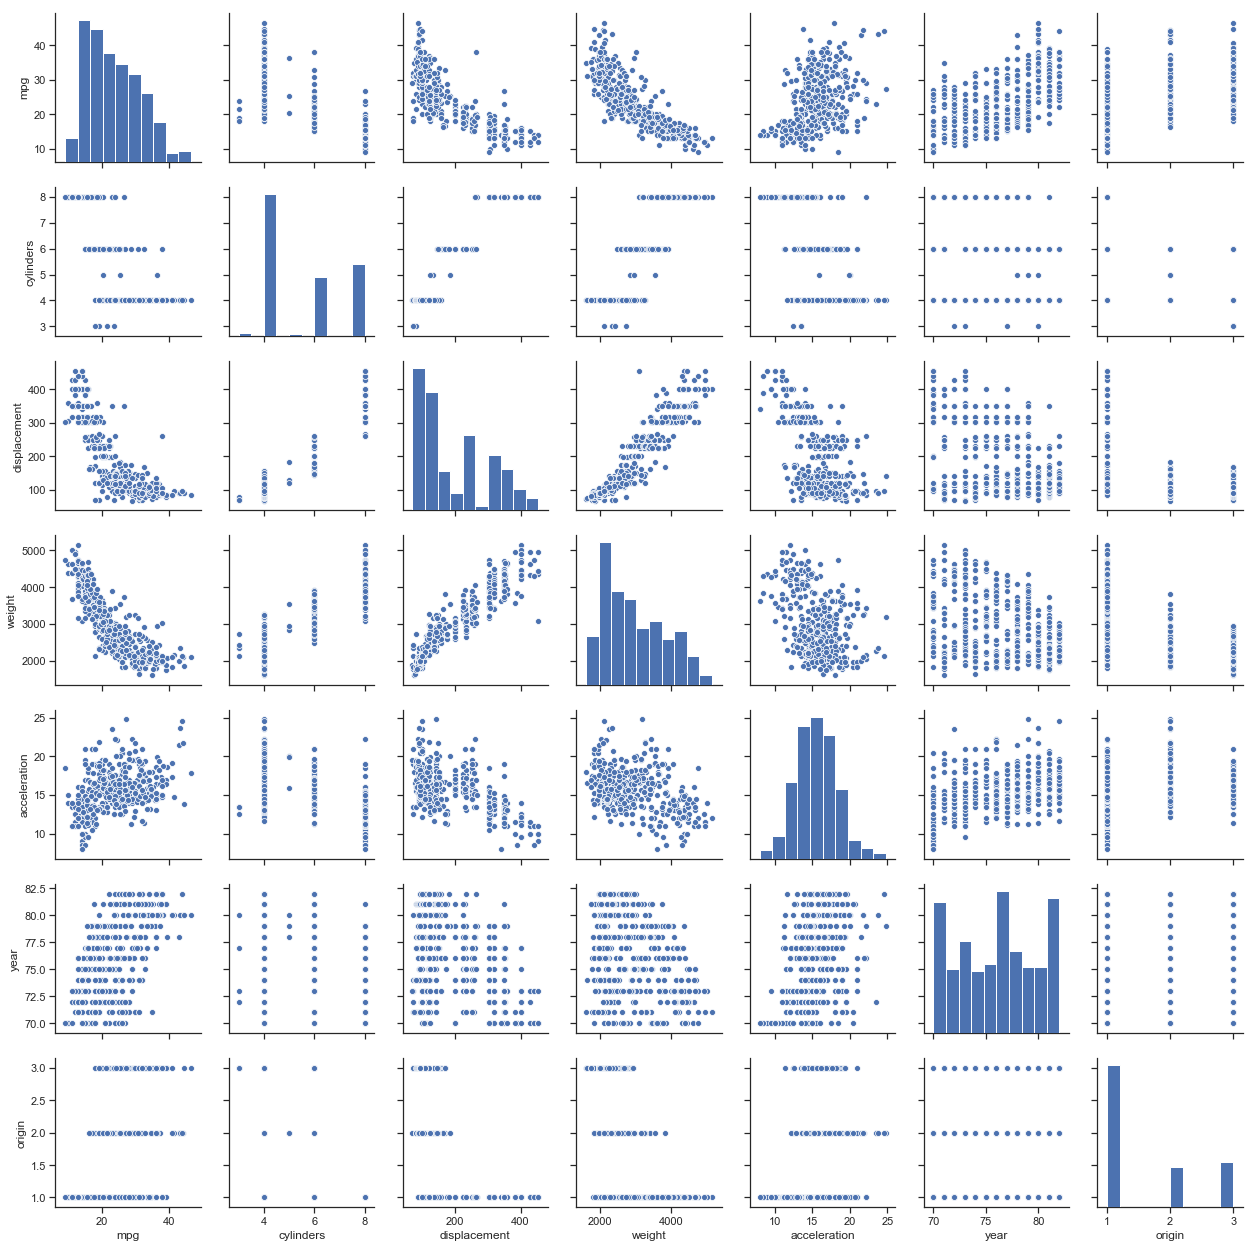

In [82]:
#plot the scatter matrix for all variables
sns.set(style="ticks")
sns.pairplot(data)

### correlation metric
##### Linear - Pearson Correlation
##### Non-linear - 

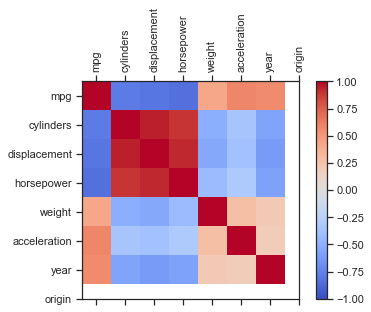

In [109]:
#test the correlation between variables
data_num = data.drop(['name'], axis=1)
corr = data_num.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_num.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_num.columns)
ax.set_yticklabels(data_num.columns)
plt.show()

In [113]:
#drop the na
data_num.shape[1]
display(data_num.head(3))
col=list(data_num)
for i in col:
    data_num=data_num[pd.to_numeric(data_num[i], errors='coerce').isnull()==False]
predictor=np.array(data_num.drop(['mpg'], axis=1)).reshape(-1,1)
display(predictor[3])
mpg=np.array(data_num['mpg']).reshape(-1,1)
display(mpg[3])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


array([3504], dtype=object)

array([16.])

In [111]:
#train model
regressor = LinearRegression()  
regressor.fit(predictor, mpg)
print('Coefficients: \n', regressor.coef_)
print('Coefficients: \n', regressor.score)

ValueError: Found input variables with inconsistent numbers of samples: [2744, 392]